In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


c:\Users\VEDANT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head()


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:

df = df.dropna()

In [4]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

## Types of Attributes in Dataset

1. Tempreature Related Features

2. Climate Related Features

3. Categorical Attributes

4. Other Numeric Attributes

### Tempreature Attributes

In [5]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax',
            'apparentTemperatureMin','apparentTemperatureMax','price']

temp_cols_num = len(temp_cols)
print("Tempreature Attributes are:",temp_cols_num-1)

Tempreature Attributes are: 11


In [6]:
temp_df = df[temp_cols]

<AxesSubplot:>

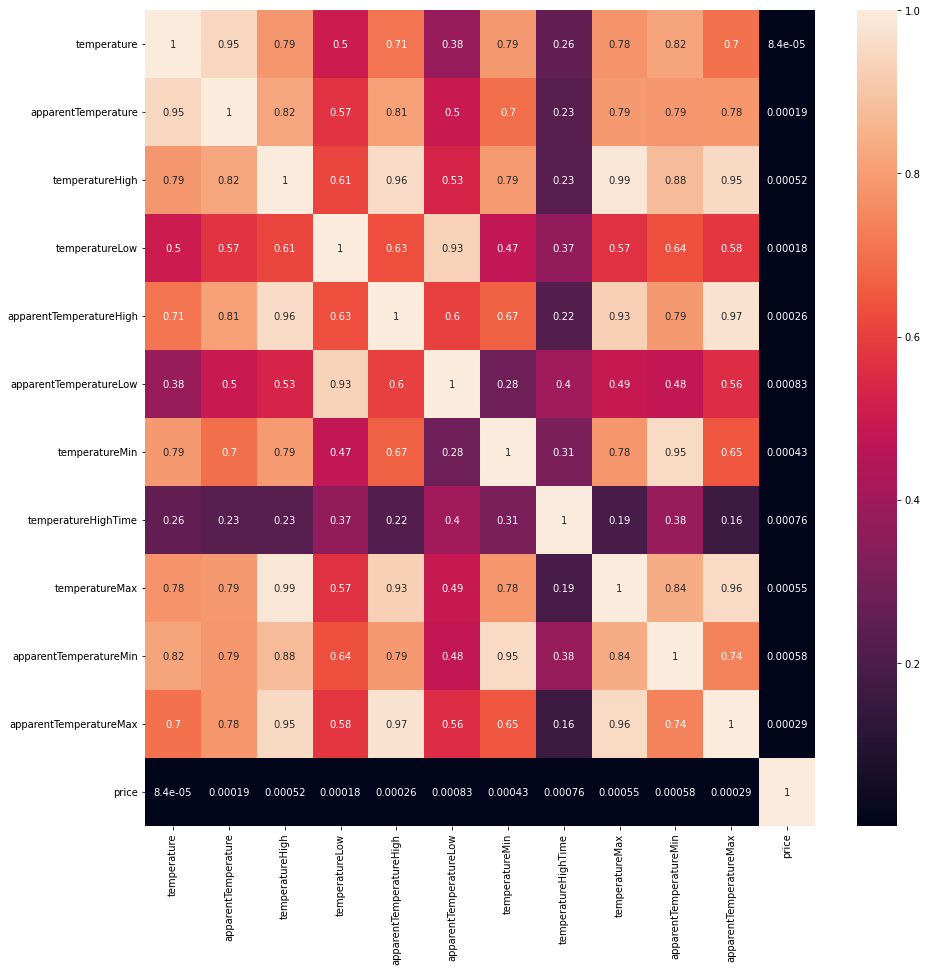

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(np.abs(temp_df.corr()),annot=True)

Since all the tempreature attributes have very low corelation wrt price(target variable) we can delete it from our dataset.

In [8]:
temp_cols.pop()
temp_cols

['temperature',
 'apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureHighTime',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

In [9]:
print(df.shape)
df.drop(temp_cols,axis=1,inplace=True)
print(df.shape)

(637976, 57)
(637976, 46)


## Climate Attribute

In [10]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
clim_num = len(climate_column)
print("Climate Attributes are:",clim_num-1)

Climate Attributes are: 14


In [11]:
clim_df = df[climate_column]

<AxesSubplot:>

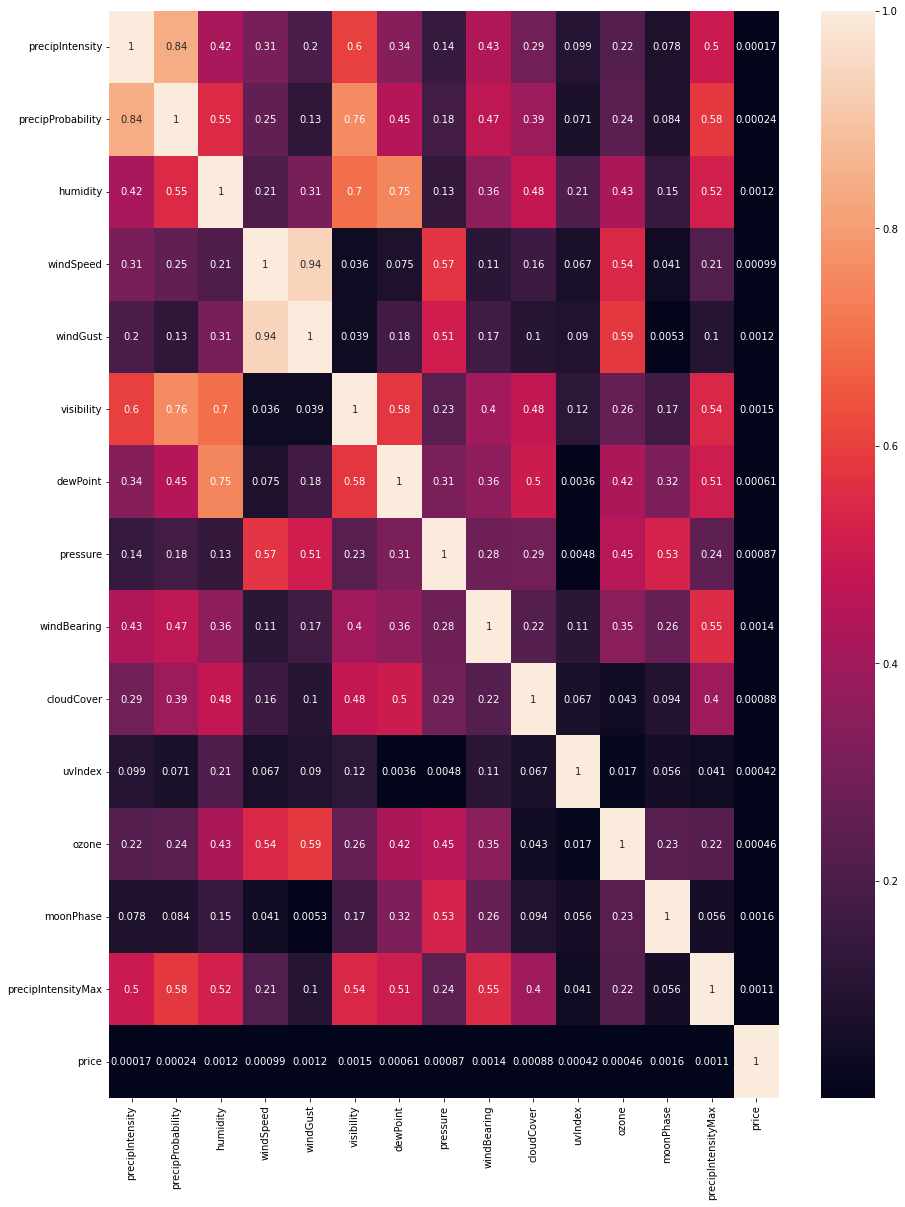

In [12]:
plt.figure(figsize=(15,20))
sns.heatmap(np.abs(clim_df.corr()),annot=True)

Since all the Climate attributes have very low corelation wrt price(target variable) we can delete it from our dataset.

In [13]:
climate_column.pop()
climate_column

['precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'dewPoint',
 'pressure',
 'windBearing',
 'cloudCover',
 'uvIndex',
 'ozone',
 'moonPhase',
 'precipIntensityMax']

In [14]:
print(df.shape)
df.drop(climate_column,axis=1,inplace=True)
print(df.shape)

(637976, 46)
(637976, 32)


In [15]:
df['datetime']=pd.to_datetime(df['datetime'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

In [17]:
categ = ["source","destination","cab_type","product_id","name","icon","short_summary","long_summary"]
categ_df = df[categ]
categ_df

,source,destination,cab_type,product_id,name,icon,short_summary,long_summary
0,Haymarket Square,North Station,Lyft,lyft_line,Shared,partly-cloudy-night,Mostly Cloudy,Rain throughout the day.
1,Haymarket Square,North Station,Lyft,lyft_premier,Lux,rain,Rain,"Rain until morning, starting again in the eve..."
2,Haymarket Square,North Station,Lyft,lyft,Lyft,clear-night,Clear,Light rain in the morning.
3,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,clear-night,Clear,Partly cloudy throughout the day.
4,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,partly-cloudy-night,Partly Cloudy,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...
693065,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,partly-cloudy-night,Partly Cloudy,Light rain in the morning and overnight.
693066,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,partly-cloudy-night,Partly Cloudy,Light rain in the morning and overnight.
693067,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,partly-cloudy-night,Partly Cloudy,Light rain in the morning and overnight.
693069,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,partly-cloudy-night,Partly Cloudy,Light rain in the morning and overnight.


In [18]:
for col in categ_df:
    print(col,categ_df[col].unique())
    print()
    

source ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type ['Lyft' 'Uber']

product_id ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

icon [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day '

In [19]:
type_df = pd.get_dummies(categ_df['name']).astype('int')
type_df2 = pd.concat([type_df,df["price"]],axis=1)
type_df2


,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,price
0,0,0,0,0,0,0,0,1,0,0,0,0,5.0
1,0,0,1,0,0,0,0,0,0,0,0,0,11.0
2,0,0,0,0,0,1,0,0,0,0,0,0,7.0
3,0,0,0,0,1,0,0,0,0,0,0,0,26.0
4,0,0,0,0,0,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,0,0,0,0,0,0,0,0,0,0,0,1,9.5
693066,0,0,0,0,0,0,0,0,0,0,1,0,13.0
693067,0,0,0,0,0,0,0,0,0,1,0,0,9.5
693069,0,1,0,0,0,0,0,0,0,0,0,0,27.0


In [20]:
correlation_matrix = type_df2.corr()
cab_price_correlation = correlation_matrix['price'][type_df2.columns]


In [21]:
cab_price_correlation

Black           0.131185
Black SUV       0.453096
Lux             0.038857
Lux Black       0.206544
Lux Black XL    0.500057
Lyft           -0.219756
Lyft XL        -0.039163
Shared         -0.333235
UberPool       -0.256930
UberX          -0.223551
UberXL         -0.028587
WAV            -0.223557
price           1.000000
Name: price, dtype: float64

In [22]:
type_df = pd.get_dummies(categ_df['icon']).astype('int')
type_df2 = pd.concat([type_df,df["price"]],axis=1)
correlation_matrix = type_df2.corr()
cab_price_correlation = correlation_matrix['price'][type_df2.columns]
cab_price_correlation


 clear-day              -0.000668
 clear-night            -0.002350
 cloudy                 -0.000729
 fog                    -0.000052
 partly-cloudy-day       0.001169
 partly-cloudy-night     0.001944
 rain                   -0.000321
price                    1.000000
Name: price, dtype: float64

In [23]:
for i in categ:

    print(i,"\n")

    type_df = pd.get_dummies(categ_df[i]).astype('int')
    type_df2 = pd.concat([type_df,df["price"]],axis=1)
    correlation_matrix = type_df2.corr()
    cab_price_correlation = correlation_matrix['price'][type_df2.columns]
    print(cab_price_correlation)
    print()

source 

Back Bay                  -0.016101
Beacon Hill               -0.028396
Boston University          0.074634
Fenway                     0.059317
Financial District         0.053468
Haymarket Square          -0.095924
North End                 -0.045006
North Station             -0.005821
Northeastern University    0.043847
South Station             -0.028216
Theatre District           0.001678
West End                  -0.014092
price                      1.000000
Name: price, dtype: float64

destination 

Back Bay                  -0.010834
Beacon Hill               -0.009565
Boston University          0.077515
Fenway                     0.051780
Financial District         0.049051
Haymarket Square          -0.074040
North End                 -0.049891
North Station              0.008360
Northeastern University    0.041467
South Station             -0.055504
Theatre District          -0.018458
West End                  -0.010306
price                      1.000000
Name: price,

In [24]:
df["product_id"].value_counts()


6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

We only take the name attribute as the rest attributes have very low corelation scores and the product_id as some corrupted data

In [25]:
df.drop(["source","destination","product_id","icon","short_summary","long_summary"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   cab_type                     637976 non-null  object        
 8   name                         637976 non-null  object        
 9   price                        637976 non-null  float64       
 10  distance                     637976 non-null  float64       
 11  surge_multiplier          

In [26]:
df.drop(["id","timestamp","timezone"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   hour                         637976 non-null  int64         
 1   day                          637976 non-null  int64         
 2   month                        637976 non-null  int64         
 3   datetime                     637976 non-null  datetime64[ns]
 4   cab_type                     637976 non-null  object        
 5   name                         637976 non-null  object        
 6   price                        637976 non-null  float64       
 7   distance                     637976 non-null  float64       
 8   surge_multiplier             637976 non-null  float64       
 9   latitude                     637976 non-null  float64       
 10  longitude                    637976 non-null  float64       
 11  windGustTime              

<AxesSubplot:>

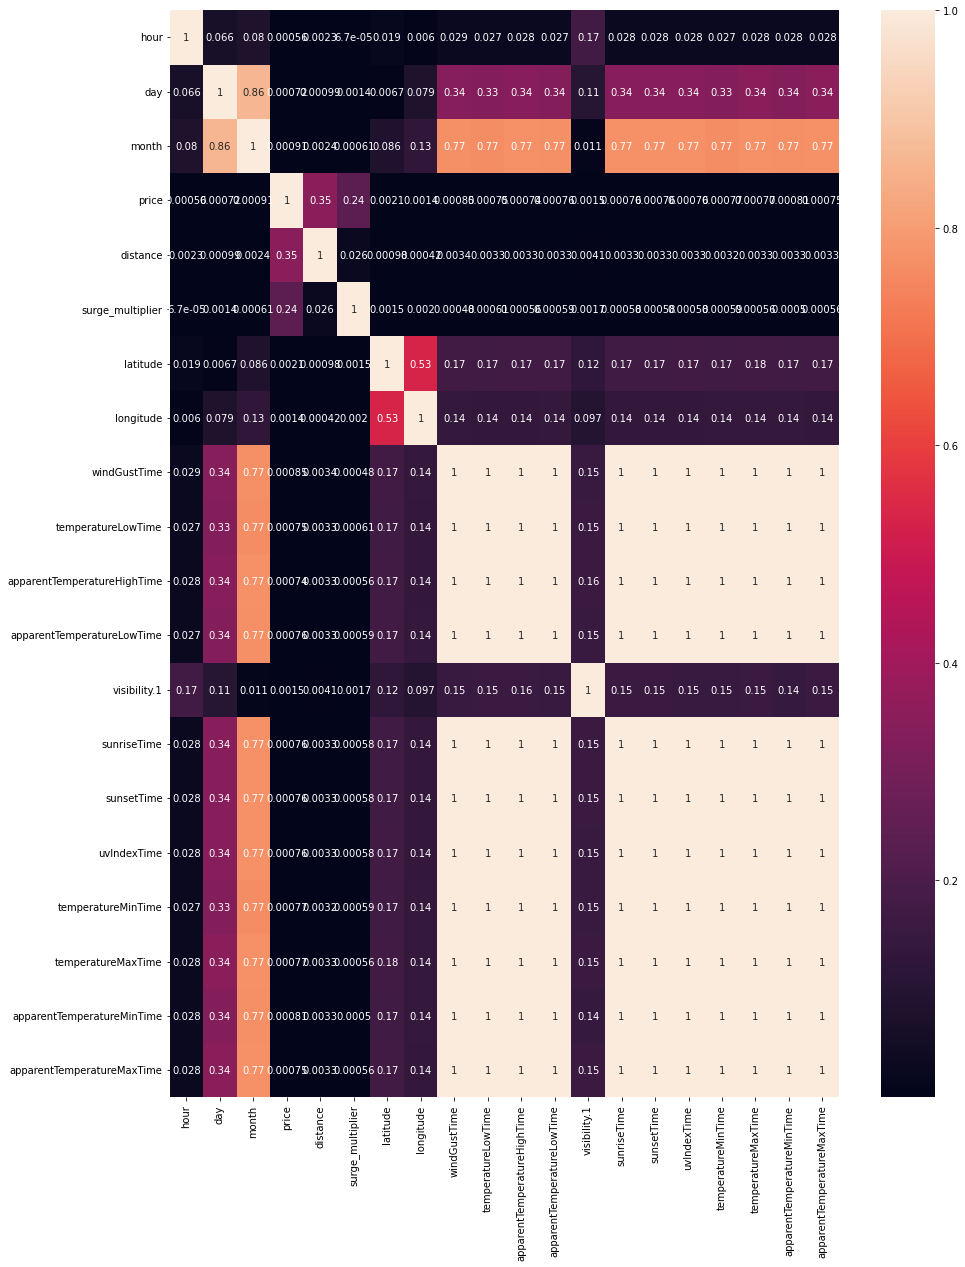

In [27]:
new_df = df.drop(["name","datetime","cab_type"],axis=1)
plt.figure(figsize=(15,20))
sns.heatmap(np.abs(new_df.corr()),annot=True)

We will only keep surge multiplier and distance

In [28]:
updated_df = df[["distance","surge_multiplier","price"]]
updated_df

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0
3,0.44,1.0,26.0
4,0.44,1.0,9.0
...,...,...,...
693065,1.00,1.0,9.5
693066,1.00,1.0,13.0
693067,1.00,1.0,9.5
693069,1.00,1.0,27.0


In [29]:
cab_type_encoded = pd.get_dummies(df["name"]).astype('int')
updated_df = pd.concat([updated_df,cab_type_encoded],axis=1)
updated_df

,distance,surge_multiplier,price,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
0,0.44,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.44,1.0,11.0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.44,1.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.44,1.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,0,0,1
693066,1.00,1.0,13.0,0,0,0,0,0,0,0,0,0,0,1,0
693067,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,1,0,0
693069,1.00,1.0,27.0,0,1,0,0,0,0,0,0,0,0,0,0


In [30]:
type_encoded = pd.get_dummies(df["cab_type"]).astype('int')
updated_df = pd.concat([updated_df,type_encoded],axis=1)
updated_df

,distance,surge_multiplier,price,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,Lyft,Uber
0,0.44,1.0,5.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0.44,1.0,11.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0.44,1.0,7.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0.44,1.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,0,0,1,0,1
693066,1.00,1.0,13.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
693067,1.00,1.0,9.5,0,0,0,0,0,0,0,0,0,1,0,0,0,1
693069,1.00,1.0,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
numeric = updated_df.iloc[:,0:3]
numeric

,distance,surge_multiplier,price
0,0.44,1.0,5.0
1,0.44,1.0,11.0
2,0.44,1.0,7.0
3,0.44,1.0,26.0
4,0.44,1.0,9.0
...,...,...,...
693065,1.00,1.0,9.5
693066,1.00,1.0,13.0
693067,1.00,1.0,9.5
693069,1.00,1.0,27.0


<AxesSubplot:>

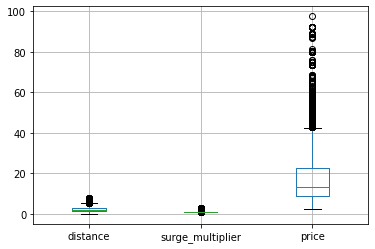

In [33]:
numeric.boxplot()

In [34]:
Qp12 = updated_df['price'].quantile(0.25)
Qp32 = updated_df['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [35]:
updated_df[updated_df['price']>(Qp32+(1.5*IQRp))]

,distance,surge_multiplier,price,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV,Lyft,Uber
706,3.25,2.00,52.5,0,0,0,1,0,0,0,0,0,0,0,0,1,0
707,3.25,2.00,67.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
769,4.76,1.00,45.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1094,4.31,1.00,45.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1318,5.33,1.00,45.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692439,5.56,1.00,47.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
692698,4.58,1.25,52.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
692891,5.42,1.00,47.5,0,0,0,0,1,0,0,0,0,0,0,0,1,0
692962,7.36,1.00,51.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
print('Size before removing :',updated_df.shape)
updated_df= updated_df[~((updated_df['price']>(Qp32+(1.5*IQRp))))]
print('Size after removing :',updated_df.shape)

Size before removing : (637976, 17)
Size after removing : (632387, 17)


5589 outliers removed

<AxesSubplot:>

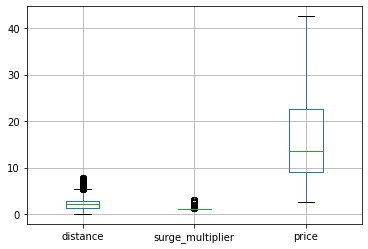

In [38]:
numeric = updated_df.iloc[:,0:3]

numeric.boxplot()

In [39]:
updated_df.to_csv("updated_dataset.csv",index=False)